

Crime dataset analysis. The dataset shows the crimes happened in a city say “XYZ” over a period of time. The dataset contains the following variables: Violent_Crime is the sum of Murder, Forcible_Rape, Robbery and Aggravated_assault Property_Crime is the sum of Burglary, Larceny_Theft and Vehicle_Theft 



I'm looking for the year when crime was at its minimum and maximum.<br>
Also I want to present the boxplot for different types of crimes and discuss your findings. <br>
Finally I want to find the most dangerous and the safest decade to live in this country.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv("crime.csv")
df.head(30)

,Year,Population,Violent_Crime,Property_Crime,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


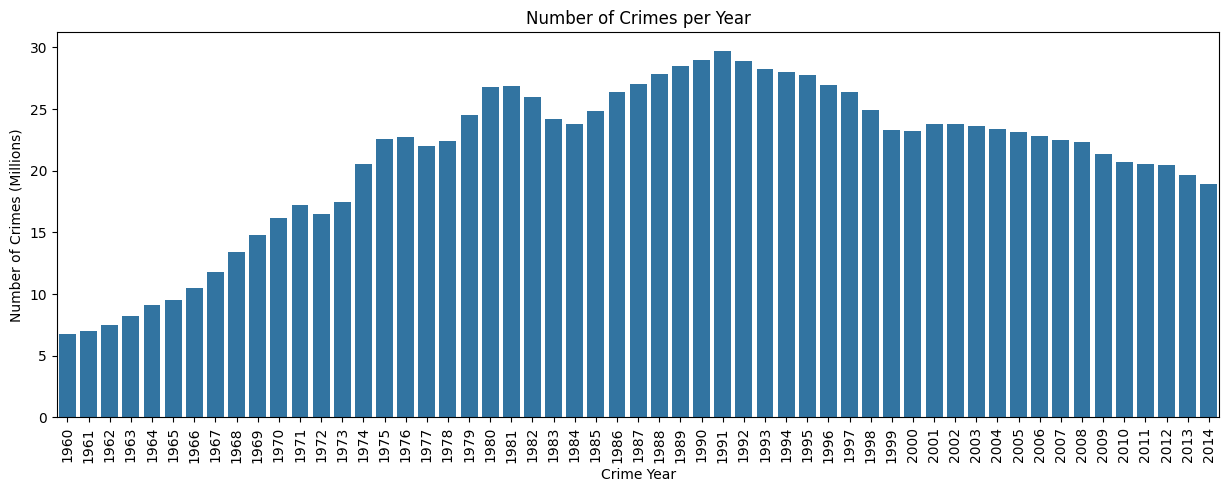

In [40]:
# Group by year and add the total crimes
df['Total_Crime'] = df['Violent_Crime'] + df['Property_Crime'] + df['Murder']  + df['Forcible_Rape'] + df["Robbery"] + df["Aggravated_assault"] + df["Burglary"] + df["Larceny_Theft"] + df["Vehicle_Theft"]
yearly_crime = df.groupby('Year')['Total_Crime'].sum().reset_index()

# Convert to millions to see the result more clearly
yearly_crime['Total_Crime_Millions'] = yearly_crime['Total_Crime'] / 1_000_000

plt.figure(figsize=(15,5))
sns.barplot(x='Year', y='Total_Crime_Millions', data=yearly_crime)
plt.xlabel('Crime Year')
plt.ylabel('Number of Crimes (Millions)')
plt.title('Number of Crimes per Year')
plt.xticks(rotation=90)
plt.show()

Find the year when crime was at its minimum and maximum.<br>
Looking at the collection of years and looking at the total amount of crimes that has happened from 1960-2014, the highest amount of crimes in the year is 1991 while the lowest amount is 1960. (This could be due to the recording techquies in the 1960 to new, fresh and not as accurate as they have become in the present)

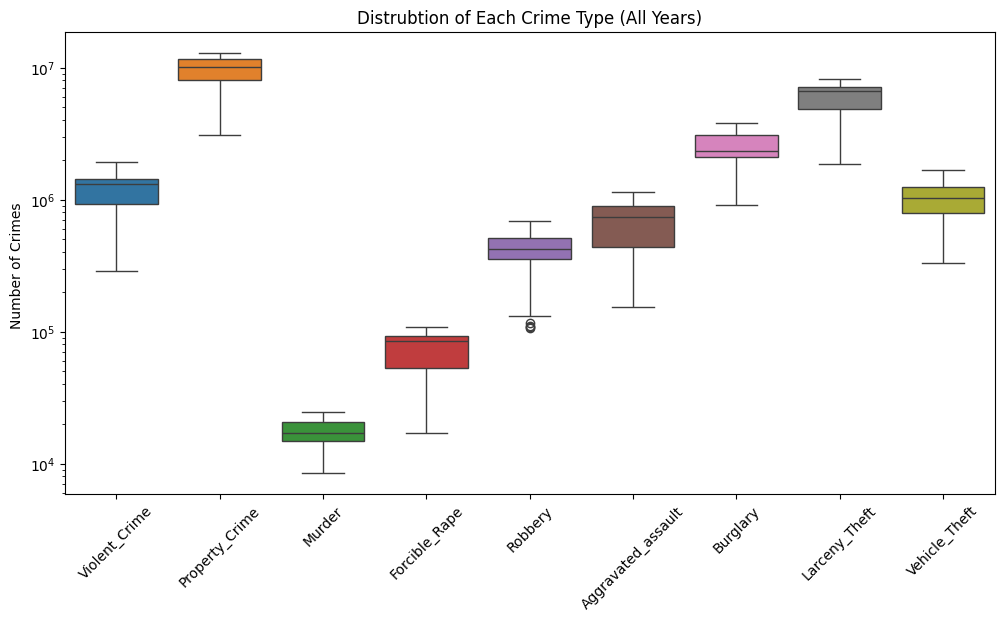

In [41]:
# Boxplot of total number of each crime type across all years (in millions)
crime_types = ['Violent_Crime', 'Property_Crime', 'Murder', 'Forcible_Rape', 'Robbery', 'Aggravated_assault', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']
totals = df[crime_types]
plt.figure(figsize=(12,6))
sns.boxplot(data = df[crime_types])
plt.yscale("log")
plt.ylabel('Number of Crimes ')
plt.title('Distrubtion of Each Crime Type (All Years)')
plt.xticks(rotation=45)
plt.show()

Present the boxplot for different types of crimes and discuss your findings. <br> 
(Note, the ranges are in millions)<br>

Looking into the total amount of different types of crime, there is a whole range of crimes that are there.<br>
However, the crime that is most commited is: Property Crime <br>
While the crime commited the leasted is: Murder

The crime that has the most amount of outliners is robbery; with all outliners being outside and  less than the boxplot itself. <br> 
This can possibly indicate that there are odd years where robbery are decreased a significant amount away from the average<br> 

Another finding is that by looking into the the placement of the box and whisker for all of this different crimes is the high varaiblity in them as the gap between the lower whiskers and the their resecptive box are big.<br> 

This could indicate that when it comes to crimes, it is more contstant to find it in to the upper portion of the box plot (thus more crimes), in comparsion to the lower portion where it can vary signinfacnt on the specific amount that year. 


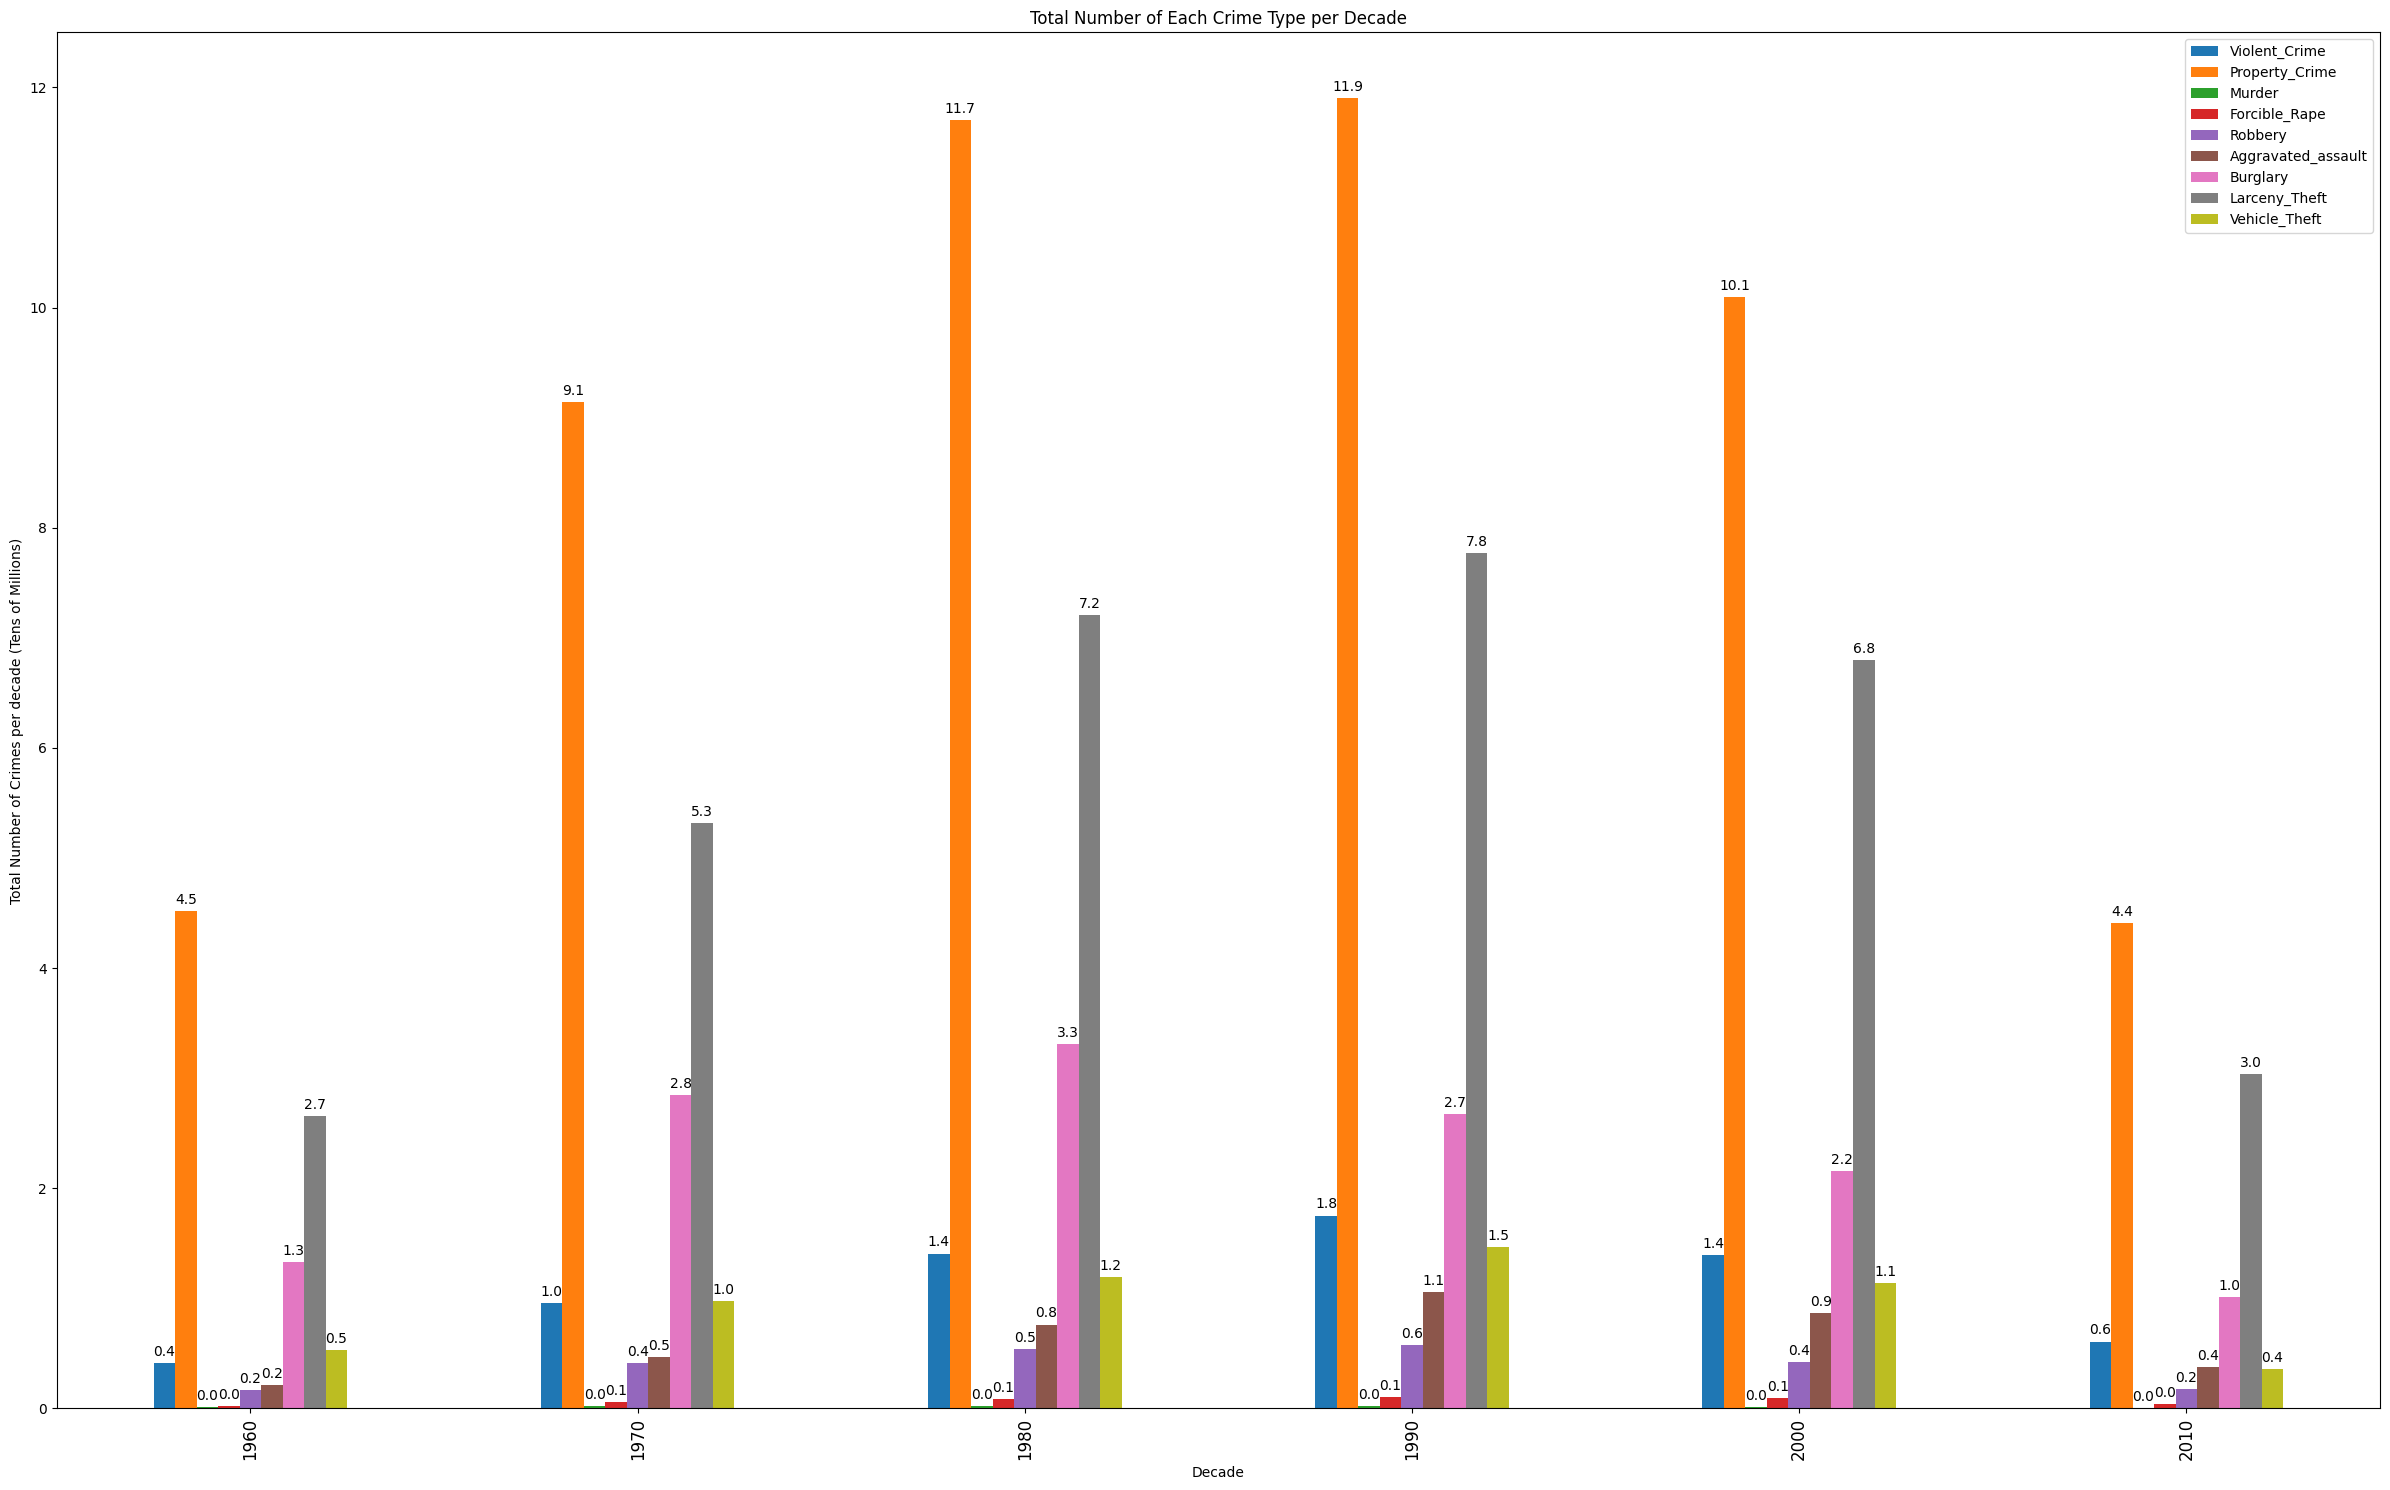

In [42]:
df["Decade"]  = (df["Year"] // 10)*10
decade_totals = df.groupby('Decade')[crime_types].sum()
decade_totals =decade_totals /10000000


ax= decade_totals.plot(kind= "bar", figsize =(24,15))
plt.ylabel('Total Number of Crimes per decade (Tens of Millions)')
plt.title('Total Number of Each Crime Type per Decade')
plt.xticks(rotation=90, fontsize = 12)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt = "%.1f", padding =3)
plt.show()


Find the most dangerous and the safest decade to live in this country.

Looking into a decade view of the crime, the most danagerious decade to live in undoubtably the 1990s. <br>
While the safest decade was a close call between two: 2010s and 1960s. Needing an additional numeric metric to the graph, the answer to the safest decade is the 1960 with a minimal difference to 2010. (about 0.2) <br> 
This indicate from the 1960s to 1990s, there was an overall increase in crimes but from the 1990s to the 2010s, there was a decrease in it, even returning back to (alomst) 1960s <br> 

This could be due to better regulations, better technology and better enforcement strategies to work on reducing crime in the more recent decades